In [1]:
import numpy as np
import sys
import empymod

sys.path.append('../')

from emulatte.model import earth
from emulatte.source.dipole import VMD

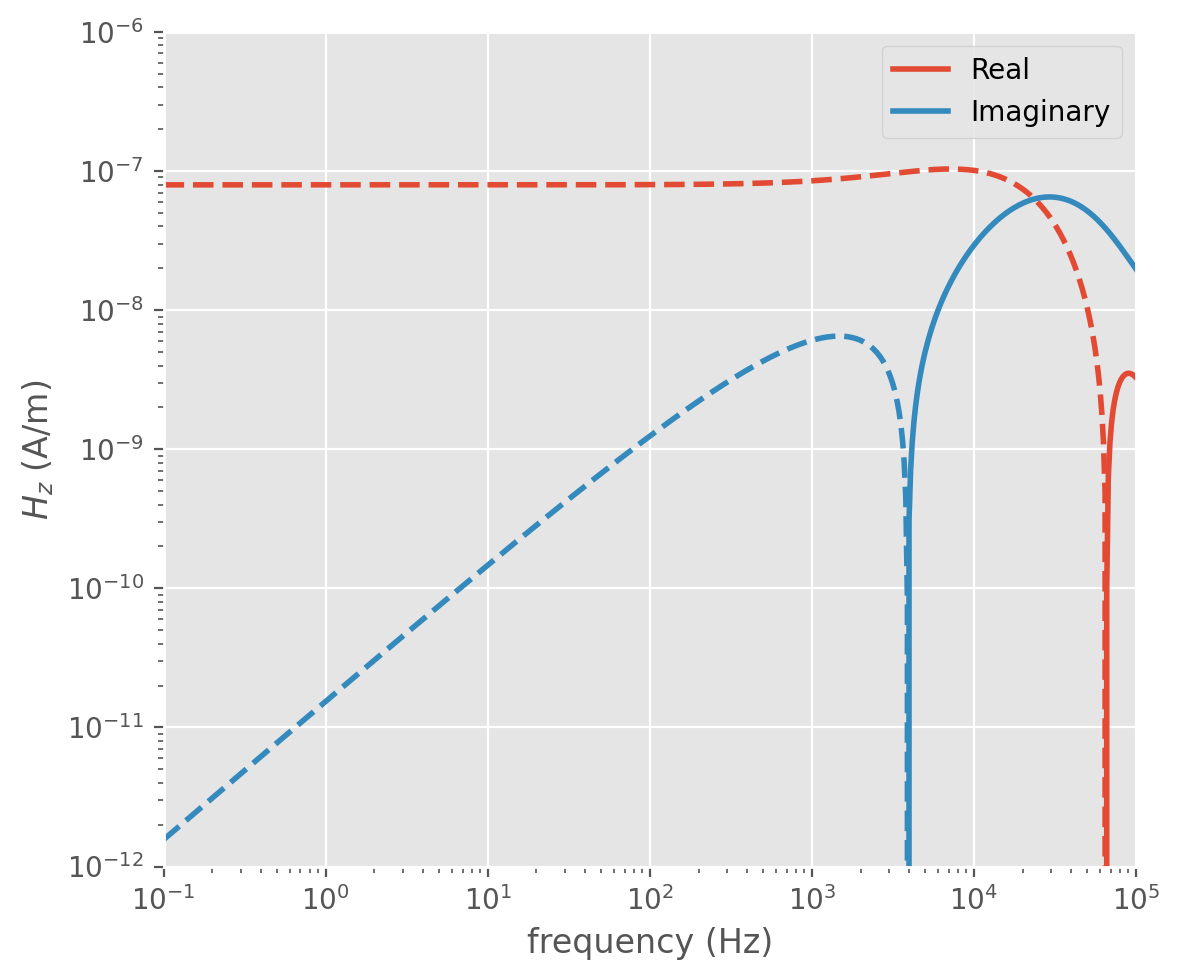

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')

import emulatte as emu
from emulatte.source import VMD

### parameter specification ###
# source coordinate [x,y,z]
tx = [0,0,0]
# receiver coordinate [x,y,z]
rx = [100,0,0]
# layer thickness
thicks = []
# resistivity of the layers
res = [100]
# frequency of transmittion
freq = np.logspace(-1, 5, 601)
# magnetic dipole moment
moment = 1

# create instances for model and source
model = emu.create_model(thicks)
vmd = VMD(moment)

# setting source & parameters
model.set_params(res)
model.set_source(vmd, tx)
model.set_filter(hankel_filter='werthmuller201')

# proceed the calculation & get answer
hz = model.field("H", "z", rx, freq)

# plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(6,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(freq, hz.real, "C0-", label="Real", linewidth=2)
ax.plot(freq, -hz.real, "C0--", linewidth=2)
ax.plot(freq, hz.imag, "C1-", label="Imaginary", linewidth=2)
ax.plot(freq, -hz.imag, "C1--", linewidth=2)
ax.set_xlim(1e-1, 1e5)
ax.set_ylim(1e-12, 1e-6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [3]:
def pos(data):
    """Return positive data; set negative data to NaN."""
    return np.array([x if x > 0 else np.nan for x in data])


def neg(data):
    """Return -negative data; set positive data to NaN."""
    return np.array([-x if x < 0 else np.nan for x in data])

In [4]:
%time
src = [0,0,0]
rec = [100,0,0]
thicks = []
res = [100]
freq = np.logspace(-1,5, 301)
model = earth.DynamicEM1D(thicks)
vmd = VMD(1)
# ここでFDTD, waveformを決める
# ontime > 0 : step-on, = 0 : impluse, < 0 : step-off, array-like :  arbitorary_wave, None : FD
# ontimeの設定はloopとlineのみ

model.set_params(res)
model.set_source(vmd, src)
# 今後のことを考えて、デジタルフィルタ（Hankel, Fourier）は外から適用できるように「も」する
model.set_filter(hankel_filter='key201')
EMF = model.field("H", "z", rec, freq)
#emulatte

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs


In [5]:
%time
# Survey parameters
freq = np.logspace(-1, 5, 301)
src = [0, 0, 0, 0, 90]
rec = [100, 0, 0, 0, 90]
depth = 0
res = [2e14, 100]

# Computation
inp = {'src': src, 'rec': rec, 'depth': depth, 'res': res,
       'freqtime': freq, 'verb': 1}
fhz_num = empymod.loop(**inp)
#empymod

CPU times: user 0 ns, sys: 2 µs, total: 2 µs
Wall time: 2.86 µs


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


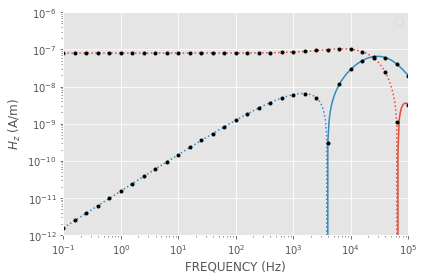

In [6]:
import matplotlib.pyplot as plt

plt.plot(freq, EMF.real, "C0-")
plt.plot(freq, -EMF.real, "C0:")
plt.plot(freq, EMF.imag, "C1-")
plt.plot(freq, -EMF.imag, "C1:")
plt.plot(freq[::10], pos(fhz_num.real)[::10], marker=".", linewidth=0, c='k')
plt.plot(freq[::10], neg(fhz_num.real)[::10], marker=".", linewidth=0, c='k')

plt.plot(freq[::10], pos(fhz_num.imag)[::10], marker=".", linewidth=0, c='k')
plt.plot(freq[::10], neg(fhz_num.imag)[::10], marker=".", linewidth=0, c='k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1, 1e5])
plt.ylim([1e-12, 1e-6])
plt.xlabel('FREQUENCY (Hz)')
plt.ylabel('$H_z$ (A/m)')
plt.legend()

plt.tight_layout()

plt.show()

In [7]:
%%time
src = [0,0,10]
rec = [100,0,10]
thicks = []
res = [1000]
time = np.logspace(-10, 0, 301)
model = earth.DynamicEM1D(thicks)
vmd = VMD(1, ontime=-1)
# ここでFDTD, waveformを決める
# ontime > 0 : step-on, = 0 : impluse, < 0 : step-off, array-like :  arbitorary_wave, None : FD
# ontimeの設定はloopとlineのみ

model.set_params(res)
model.set_source(vmd, src)
# 今後のことを考えて、デジタルフィルタ（Hankel, Fourier）は外から適用できるように「も」する
model.set_filter(hankel_filter='key201', ftdt_config={"method" : "fft", "filter" : "key_time_201"})
EMF = model.field("H", "z", rec, time)
#emulatte

CPU times: user 67.7 ms, sys: 46.5 ms, total: 114 ms
Wall time: 69.2 ms


In [8]:
%%time
src = [0,0,10]
rec = [100,0,10]
thicks = []
res = [1000]
time = np.logspace(-10, 0, 301)
model = earth.DynamicEM1D(thicks)
vmd = VMD(1, ontime=-1)
# ここでFDTD, waveformを決める
# ontime > 0 : step-on, = 0 : impluse, < 0 : step-off, array-like :  arbitorary_wave, None : FD
# ontimeの設定はloopとlineのみ

model.set_params(res)
model.set_source(vmd, src)
# 今後のことを考えて、デジタルフィルタ（Hankel, Fourier）は外から適用できるように「も」する
model.set_filter(hankel_filter='key201', ftdt_config={"method" : "dlag"})
EMF_d = model.field("H", "z", rec, time)

CPU times: user 152 ms, sys: 138 ms, total: 290 ms
Wall time: 71.4 ms


In [9]:
%%time
# Survey parameters
time = np.logspace(-10, 0, 301)

src = [0, 0, 10, 0, 90]
rec = [100, 0, 10, 0, 90]
depth = 0
res = [2e14, 1000]

eperm = [0, 0]  # Reduce early time numerical noise (diffusive approx for air)
inp = {'src': src, 'rec': rec, 'depth': depth, 'res': res,
       'freqtime': time, 'verb': 1, 'xdirect': True, 'epermH': eperm}

hz_num = empymod.loop(signal=-1, **inp)
#empymod

CPU times: user 15 ms, sys: 12.4 ms, total: 27.4 ms
Wall time: 9.04 ms


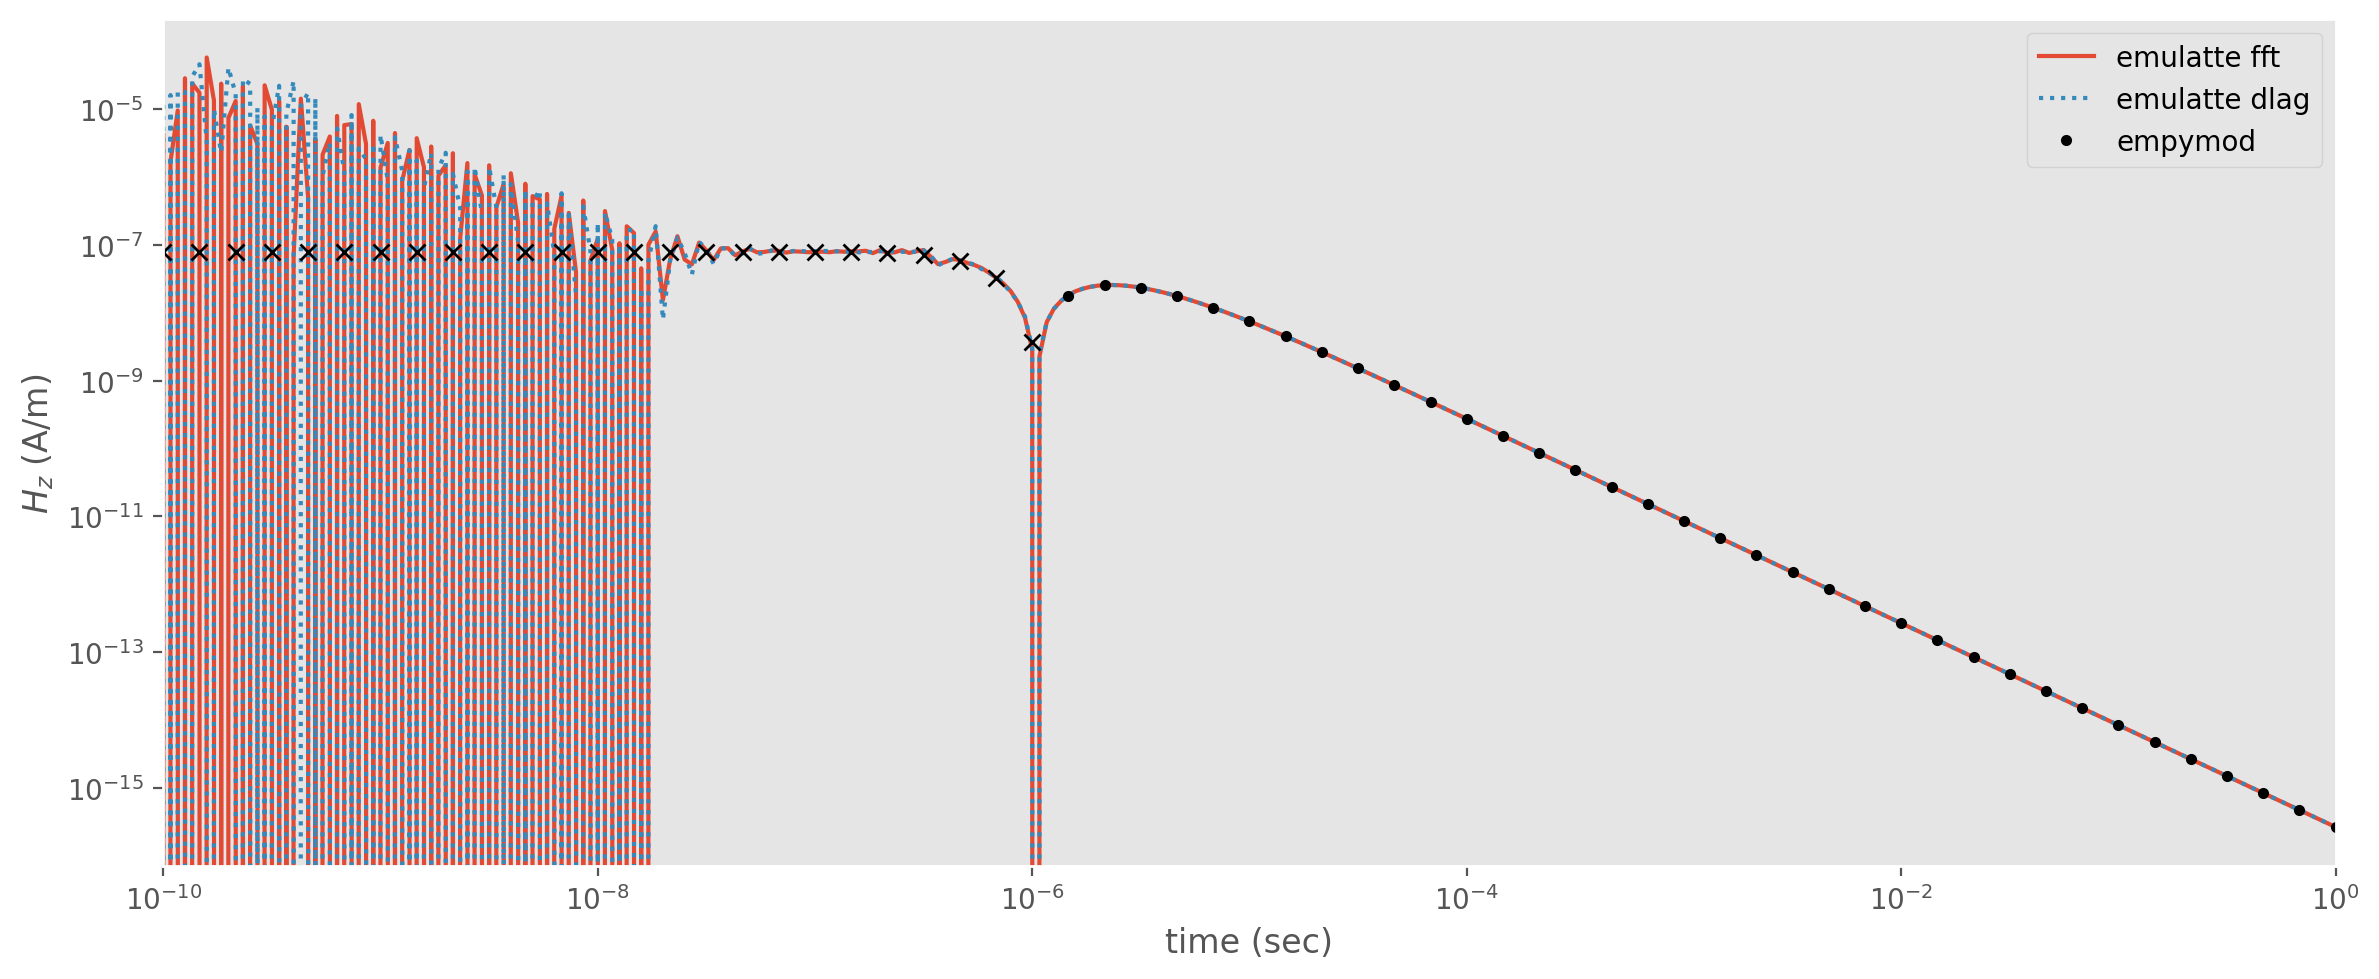

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(time, EMF, "C0-", label='emulatte fft')
ax.plot(time, -EMF, "C0-")
ax.plot(time, EMF_d, "C1:", label='emulatte dlag')
ax.plot(time, -EMF_d, "C1:")
ax.plot(time[::5], pos(hz_num)[::5], marker=".", linewidth=0, c='k', label='empymod')
ax.plot(time[::5], neg(hz_num)[::5], marker="x", linewidth=0, c='k')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-10, 1e0])
#ax.ylim([1e-12, 1e-6])
ax.set_xlabel('time (sec)')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()
ax.grid()
plt.tight_layout()

plt.show()

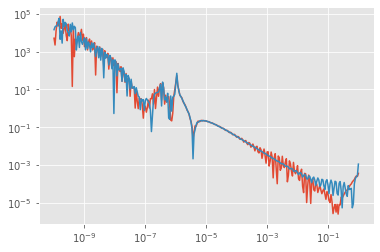

In [11]:
rel_err_fft = abs(hz_num - EMF) / abs(hz_num) * 100
rel_err_dlag = abs(hz_num - EMF_d) / abs(hz_num) * 100


plt.loglog(time, rel_err_fft)
plt.loglog(time, rel_err_dlag)

In [12]:
%%time
src = [0,0,10]
rec = [100,0,10]
thicks = []
res = [1]
time = np.logspace(-10, 0, 501)
model = earth.DynamicEM1D(thicks)
vmd = VMD(1, ontime=-1)
# ここでFDTD, waveformを決める
# ontime > 0 : step-on, = 0 : impluse, < 0 : step-off, array-like :  arbitorary_wave, None : FD
# ontimeの設定はloopとlineのみ

model.set_params(res)
model.set_source(vmd, src)
EMF_d = model.field("B", "xyz", rec, time)

CPU times: user 129 ms, sys: 71.7 ms, total: 200 ms
Wall time: 86.8 ms


In [13]:
EMF_d

array([[ 3.99572728e-18, -1.77043034e-18, -2.93745321e-18, ...,
        -5.93675259e-19, -5.41458229e-19, -4.93850913e-19],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.86746262e-13, -1.54730693e-13, -1.12869715e-13, ...,
         1.23675819e-17,  1.15386082e-17,  1.07653677e-17]])

In [14]:
import emulatte as emu
from emulatte.source import VMD

In [15]:
m = emu.create_model([3])

In [16]:
m.set_params([1,2])
m.set_source(VMD(1), [0,0,0])
emf = m.field("H", "z", [0,1,0], [1, 10, 100, 1000])

In [17]:
emf

array([-0.07951706-1.44049328e-07j, -0.07951706-1.43788074e-06j,
       -0.07951721-1.42912361e-05j, -0.07952343-1.39584363e-04j])